This notebook demonstrates the use of PmagPy functions from within a  Jupyter notebook in parallel with the PmagPy cookbook http://earthref.org/PmagPy/cookbook.

It is meant to function from within the PmagPy data_files/notebooks directory and calls are relative to that.  

First, we import the pmagpy modules, **pmagplotlib**, **pmag** and **ipmag** and some other handy functions for use in the notebook.

INSERT LINK TO COOKBOOK WITH INSTALLATION INSTRUCTIONS

INSERT INTRO TO MAGIC DATA MODEL 3
- BASIC STRUCTION
- USING WITH PANDAS

In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
from importlib import reload


## angle

There are several ways to use this from the notebook - one loading the data into a Pandas dataframe, then convert to the desired arrays, or load directly into a Numpy array of desired shape.  

In [2]:
help(pmag.angle)

Help on function angle in module pmagpy.pmag:

angle(D1, D2)
    Calculate the angle between two directions.
    
    Parameters
    ----------
    D1 : Direction 1 as an array of [declination, inclination] pair or pairs
    D2 : Direction 2 as an array of [declination, inclination] pair or pairs
    
    Returns
    -------
    angle : angle between the directions as a single-element array
    
    Examples
    --------
    >>> pmag.angle([350.0,10.0],[320.0,20.0])
    array([ 30.59060998])



In [3]:
# Pandas way:
di=pd.read_csv('../angle/angle.dat',delim_whitespace=True,header=None)
#rename column headers
di.columns=['Dec1','Inc1','Dec2','Inc2']
# call pmag.angle
pmag.angle(di[['Dec1','Inc1']].values,di[['Dec2','Inc2']].values)

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

In [206]:
# Numpy way:
di=np.loadtxt('../angle/angle.dat').transpose() # read in file
D1=di[0:2].transpose() # assign to first array
D2=di[2:].transpose() # assign to second array
pmag.angle(D1,D2) # call pmag.angle

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

## ani_depthplot
We will use the **ipmag** version of this program which assumes the MagIC data model 3. If you want datamodel 2, just use **ipmag.ani_depthplot2().  

In [5]:
help(ipmag.ani_depthplot)

Help on function ani_depthplot in module pmagpy.ipmag:

ani_depthplot(spec_file='specimens.txt', samp_file='samples.txt', meas_file='measurements.txt', site_file='sites.txt', age_file=None, sum_file=None, fmt='svg', dmin=-1, dmax=-1, depth_scale='core_depth', dir_path='.')
    returns matplotlib figure with anisotropy data plotted against depth
    available depth scales: 'composite_depth', 'core_depth' or 'age' (you must provide an age file to use this option)



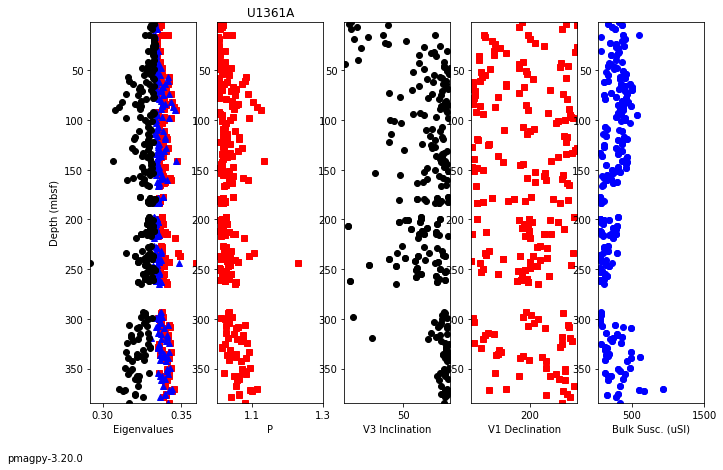

In [6]:
ipmag.ani_depthplot(dir_path='../../data_files/ani_depthplot');

## aniso_magic

In notebooks, we can use:  **ipmag.aniso_magic_nb()**.  There are two example files, one from some sediments, which we can compare the V3 direction with vertical, and a dike which we can compare directions with the plane of the dike.  

In [247]:
help(ipmag.aniso_magic_nb)

Help on function aniso_magic_nb in module pmagpy.ipmag:

aniso_magic_nb(infile='specimens.txt', samp_file='', site_file='', verbose=1, ipar=0, ihext=1, ivec=0, isite=0, iloc=0, iboot=0, vec=0, Dir=[], PDir=[], crd='s', num_bootstraps=1000, dir_path='.')
    Makes plots of anisotropy eigenvectors, eigenvalues and confidence bounds
    Inputs:
        verbose : if True, print messages to output
        Data Model 3.0 only formated files:
            infile : specimens formatted file with aniso_s data
            samp_file : samples formatted file with sample => site relationship
            site_file : sites formatted file with site => location relationship
        isite : if True plot by site, requires non-blank samp_file
        iloc : if True plot by location, requires non-blank samp_file, and site_file
        Dir : [Dec,Inc] list for comparison direction
        vec : eigenvector for comparison with Dir
        PDir : [Pole_dec, Pole_Inc] for pole to plane for comparison
        crd

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


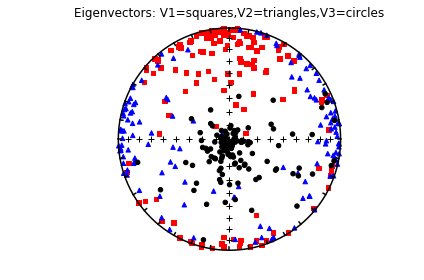

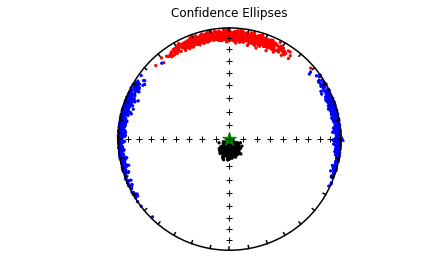

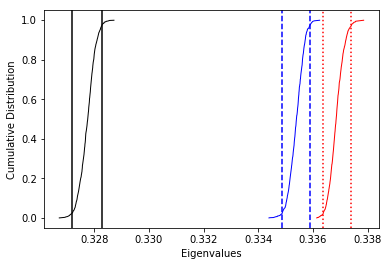

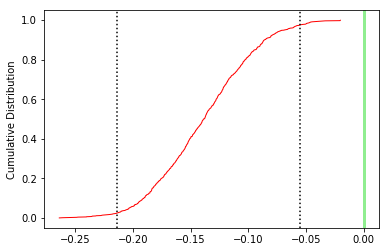

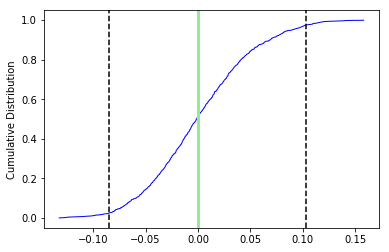

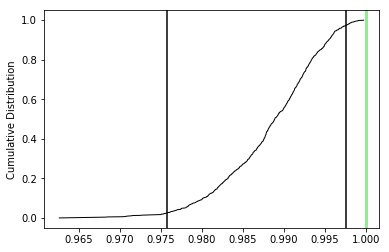

In [248]:
ipmag.aniso_magic_nb(infile='sed_specimens.txt',dir_path='../aniso_magic',\
       iboot=1,ihext=0,ivec=1,Dir=[0,90],vec=3,ipar=1) # parametric bootstrap and compare V3 with vertical

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


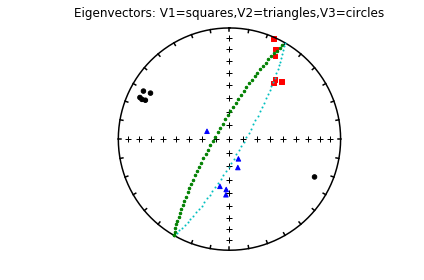

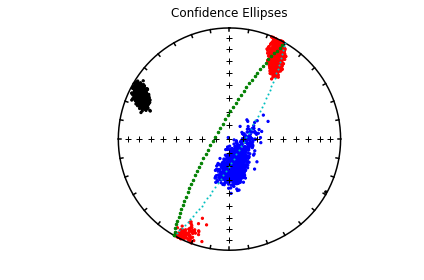

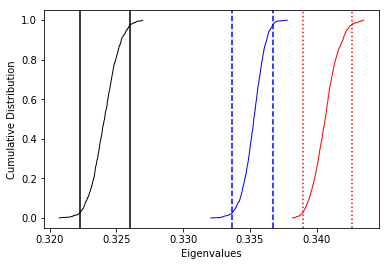

In [249]:
ipmag.aniso_magic_nb(infile='dike_specimens.txt',dir_path='../aniso_magic',\
       iboot=1,ihext=0,ivec=1,PDir=[120,10],ipar=1) # compare dike directions with plane of dike with pole of 120,10

NOTE TO SELF:  Add in 'by site' or 'by sample' as in dmag_magic.  

## apwp

This program calls the function **pmag.bc02** which returns the pole for the plate for that age.  

apwp.py then does the favor of calling **pmag.vgp_di** to calculate the direction at the desired location (**site_lat** and **site_lon**) and pmag.magnetic_lat() to get the paleolatitude.  

This can all be done directly from within the notebook.


In [16]:
help(pmag.bc02)

Help on function bc02 in module pmagpy.pmag:

bc02(data)
    get APWP from Besse and Courtillot 2002 paper
    
    Parameters
    ----------
    Takes input as [plate, site_lat, site_lon, age]
    plate : string (options: AF, ANT, AU, EU, GL, IN, NA, SA)
    site_lat : float
    site_lon : float
    age : float in Myr
    
    Returns
    ----------



In [17]:
data=['NA',33,-117,100]
pole_lat,pole_lon=pmag.bc02(data)
dec,inc=pmag.vgp_di(pole_lat,pole_lon,data[1],data[2])
paleo_lat=pmag.magnetic_lat(inc)
print (' Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.')
print ('%7.1f %7.1f %7.1f %7.1f %7.1f  %7.1f\n' \
       %(data[3],paleo_lat,dec,inc,pole_lat,pole_lon))


 Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.
  100.0    38.8   352.4    58.1    81.5    198.3



## b_vdm.py

b_vdm.py calls **pmag.b_vdm()** which we can do directly from within the notebook

In [18]:
help(pmag.b_vdm)

Help on function b_vdm in module pmagpy.pmag:

b_vdm(B, lat)
    Converts a magnetic field value (input in units of tesla) to a virtual
    dipole moment (VDM) or a virtual axial dipole moment (VADM; output
    in units of Am^2)
    
    Parameters
    ----------
    B: local magnetic field strength in tesla
    lat: latitude of site in degrees
    
    Returns
    ----------
    V(A)DM in units of Am^2



In [19]:
b,lat=33e-6,22 # field (in tesla), and latitude
pmag.b_vdm(b,lat) # output in Am^2

7.1588159745117882e+22

## biplot_magic 

We can reproduce the plots that biplot_magic make using Pandas.  The key to what measurements mean is in the method codes, so we can first get a unique list of method_codes, then plot one against the other.  Let's read in the data file in to a Pandas dataframe and exctract the method codes: 

In [20]:
meas=pd.read_csv('../biplot_magic/measurements.txt',sep='\t',header=1)
print(meas.method_codes.unique())
meas.head()

['LT-AF-Z' 'LT-AF-I' 'LT-IRM' 'LP-X']


,citations,dir_dec,dir_inc,experiment,magn_mass,meas_temp,measurement,method_codes,quality,specimen,standard,susc_chi_mass,treat_ac_field,treat_dc_field,treat_step_num,treat_temp
0,This study,268.5,-41.2,15-1-013:LP-AF-DIR,0.000003,300,15-1-013:LP-AF-DIR-1,LT-AF-Z,g,15-1-013,u,NaN,0.015,0.00000,1.0,300
1,This study,NaN,NaN,15-1-013:LP-ARM,0.000179,300,15-1-013:LP-ARM-2,LT-AF-I,g,15-1-013,u,NaN,0.080,0.00005,2.0,300
2,This study,NaN,NaN,15-1-013:LP-IRM,0.003600,300,15-1-013:LP-IRM-3,LT-IRM,g,15-1-013,u,NaN,0.000,1.00000,3.0,300
3,This study,NaN,NaN,15-1-013:LP-X,NaN,300,15-1-013:LP-X-4,LP-X,NaN,15-1-013,NaN,2.380000e-07,0.010,0.00000,4.0,300
4,This study,181.0,68.6,15-1-022:LP-AF-DIR,0.000011,300,15-1-022:LP-AF-DIR-5,LT-AF-Z,g,15-1-022,u,NaN,0.015,0.00000,5.0,300


These are an AF demag step, an ARM, an IRM and a susceptibility.  Now we can fish out data for each method, merge them by specimen, dropping any missing measurements and plot one against the other.  

In [21]:
IRM=meas[meas.method_codes.str.contains('LT-IRM')]
IRM=IRM[['specimen','magn_mass']]
IRM.columns=['specimen','IRM']
ARM=meas[meas.method_codes.str.contains('LT-AF-I')]
ARM=ARM[['specimen','magn_mass']]
ARM.columns=['specimen','ARM']
CHI=meas[meas.method_codes.str.contains('LP-X')]
CHI=CHI[['specimen','susc_chi_mass']]  
CHI.columns=['specimen','CHI']
RMRMs=pd.merge(IRM,ARM,on='specimen')
RMRMs=pd.merge(RMRMs,CHI,on='specimen')

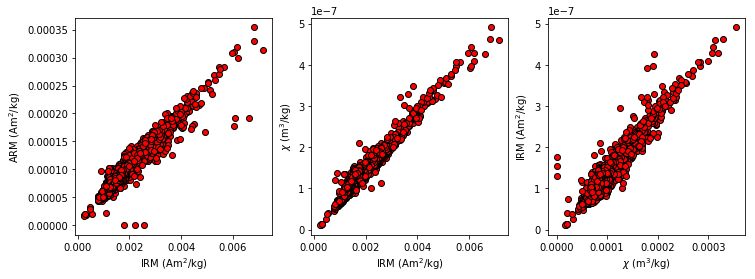

In [24]:
fig=plt.figure(1, (12,4))
fig.add_subplot(131)
plt.plot(RMRMs.IRM,RMRMs.ARM,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('ARM (Am$^2$/kg)')
fig.add_subplot(132)
plt.plot(RMRMs.IRM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('$\chi$ (m$^3$/kg)')
fig.add_subplot(133)
plt.plot(RMRMs.ARM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('$\chi$ (m$^3$/kg)')
plt.ylabel('IRM (Am$^2$/kg)');

## cart_dir
cart_dir.py calls pmag.cart2dir()  which we can call directly from the notebook

In [25]:
help(pmag.cart2dir)

Help on function cart2dir in module pmagpy.pmag:

cart2dir(cart)
    Converts a direction in cartesian coordinates into declination, inclinations
    
    Parameters
    ----------
    cart : input list of [x,y,z]
    
    Returns
    -------
    direction_array : returns an array of [declination, inclination, intensity]
    
    Examples
    --------
    >>> pmag.cart2dir([0,1,0])
    array([ 90.,   0.,   1.])



In [26]:
# read in data file from example file
cart=np.loadtxt('../cart_dir/cart_dir_example.dat')
print ('Input: \n',cart)
print ('Output: \n',pmag.cart2dir(cart))

Input: 
 [[ 0.3971 -0.1445  0.9063]
 [-0.5722  0.04   -0.8192]]
Output: 
 [[ 340.00415104   65.00211761    0.99997417]
 [ 176.00120788  -55.00063858    1.00005074]]


## chi_magic.py 
chi_magic.py reads in a MagIC data model 2.5 file, and makes various plots.  ../chi_magic/measurements.txt has bee upgraded to  We can reproduce these with Pandas...  

In [27]:
# read in data from data model 3 example file
chi_data=pd.read_csv('../chi_magic/measurements.txt',sep='\t',header=1)
print (chi_data.columns)
# get arrays of available temps, frequencies and fields
Ts=np.sort(chi_data.meas_temp.unique())
Fs=np.sort(chi_data.meas_freq.unique())
Bs=np.sort(chi_data.meas_field_ac.unique())


Index(['citations', 'experiment', 'instrument_codes', 'meas_field_ac',
       'meas_freq', 'meas_temp', 'method_codes', 'specimen',
       'susc_chi_qdr_volume', 'susc_chi_volume', 'timestamp'],
      dtype='object')


Text(0.5,1,'B = 3.00e-04 T')

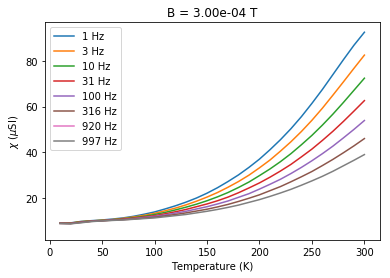

In [28]:
# plot chi versus temperature at constant field
b=Bs.max()
for f in Fs:
    this_f=chi_data[chi_data.meas_freq==f]
    this_f=this_f[this_f.meas_field_ac==b]
    plt.plot(this_f.meas_temp,1e6*this_f.susc_chi_volume,label='%i'%(f)+' Hz')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

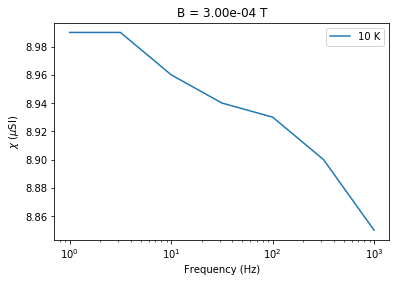

In [29]:
# plot chi versus frequency at constant B
b=Bs.max()
t=Ts.min()
this_t=chi_data[chi_data.meas_temp==t]
this_t=this_t[this_t.meas_field_ac==b]
plt.semilogx(this_t.meas_freq,1e6*this_t.susc_chi_volume,label='%i'%(t)+' K')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T');

## common_mean
ipmag.common_mean_bootrap does the same job as the command line program common_mean.py 

In [30]:
help(ipmag.common_mean_bootstrap)

Help on function common_mean_bootstrap in module pmagpy.ipmag:

common_mean_bootstrap(Data1, Data2, NumSims=1000, save=False, save_folder='.', fmt='svg', figsize=(7, 2.3), x_tick_bins=4)
    Conduct a bootstrap test (Tauxe, 2010) for a common mean on two declination,
    inclination data sets. Plots are generated of the cumulative distributions
    of the Cartesian coordinates of the means of the pseudo-samples (one for x,
    one for y and one for z). If the 95 percent confidence bounds for each
    component overlap, the two directions are not significantly different.
    
    Parameters
    ----------
    Data1 : a nested list of directional data [dec,inc] (a di_block)
    Data2 : a nested list of directional data [dec,inc] (a di_block)
    NumSims : number of bootstrap samples (default is 1000)
    save : optional save of plots (default is False)
    save_folder : path to directory where plots should be saved
    fmt : format of figures to be saved (default is 'svg')
    figsize : 

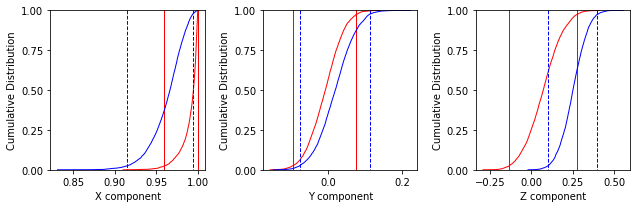

In [31]:
directions_A=np.loadtxt('../common_mean/common_mean_ex_file1.dat')
directions_B=np.loadtxt('../common_mean/common_mean_ex_file2.dat') 
ipmag.common_mean_bootstrap(directions_A,directions_B,figsize=(9,3))

## cont_rot 
This program reads in the outlines of continents from **continents.get_cont()**, rotates around a rotation pole and angle as specified by the age  and continent in question (from **frp.get_pole()** using **pmag.ptROT()**.  It then plots them using basemap in **pmagplotlib.plotMAP()** (or **pmagplotlib.plot_map** for cartopy version.  Here will will reproduce it more directly through the notebook.  

In [32]:
# load in the continents module
import pmagpy.continents as continents
import pmagpy.frp as frp
help(continents.get_continent)

Help on function get_continent in module pmagpy.continents:

get_continent(continent)
    get_continent(continent)
    returns the outlines of specified continent.
    
    Parameters:
    ____________________
    continent:
        af : Africa
        congo : Congo
        kala : Kalahari
        aus : Australia
        balt : Baltica
        eur : Eurasia
        ind : India
        sam : South America
        ant : Antarctica
        grn : Greenland
        lau : Laurentia
        nam : North America
        gond : Gondawanaland
    Returns : 
        array of [lat/long] points defining continent



In [33]:
help(pmagplotlib.plotMAP)

Help on function plotMAP in module pmagpy.pmagplotlib:

plotMAP(fignum, lats, lons, Opts)
    plotMAP(fignum, lats,lons,Opts)
    makes a basemap with lats/lons
        Windows 10 users, see plot_map
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options: 
        Opts.keys=
            latmin : minimum latitude for plot
            latmax : maximum latitude for plot
            lonmin : minimum longitude for plot
            lonmax : maximum longitude
            lat_0 : central latitude
            lon_0 : central longitude
            proj : projection [basemap projections, e.g., moll=Mollweide, merc=Mercator, ortho=orthorhombic,
                lcc=Lambert Conformal]
            sym : matplotlib symbol
            symsize : symbol size in pts
            pltgrid : plot the grid [1,0]
            res :  resolution [c,l,i,h] for crude, low, interme

/Users/ltauxe/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


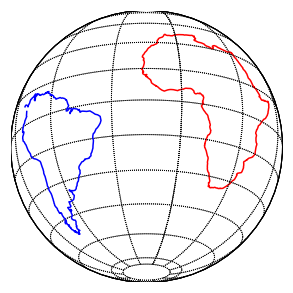

In [34]:
# retrieve continental outline
af=continents.get_continent('af').transpose()
sam=continents.get_continent('sam').transpose()


#define options for pmagplotlib.plotMAP
plt.figure(1,(5,5))
Opts = {'latmin': -90, 'latmax': 90, 'lonmin': 0., 'lonmax': 360., 'lat_0': -20, \
            'lon_0': 345,'proj': 'ortho', 'sym': 'r-', 'symsize': 3,\
            'pltgrid': 0, 'res': 'c', 'boundinglat': 0.}
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam[0],sam[1],Opts)

Now for the rotation part.  These are in a function called frp.get_pole()

In [35]:
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    get_pole(continent,age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters:
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Outputs:
          returns  [pole longitude, pole latitude, rotation angle] for the continent at specified age



In [36]:
# get the rotation pole for south america relative to South Africa at 180 Ma
sam_pole=frp.get_pole('sam',180)
# NB: for african rotations, first rotate other continents to fixed Africa, then 
# rotate with South African pole (saf)


The rotation is done by pmag.PTrot.

In [37]:
help(pmag.PTrot)

Help on function PTrot in module pmagpy.pmag:

PTrot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated



so here we go...  

/Users/ltauxe/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


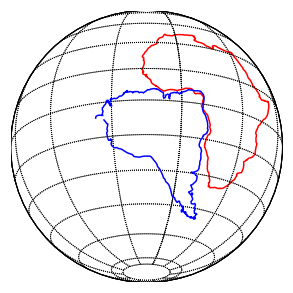

In [38]:
plt.figure(1,(5,5))
sam_rot=pmag.PTrot(sam_pole,sam[0],sam[1]) # same for south america
# and plot 'em
Opts['sym']='r-'
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam_rot[0],sam_rot[1],Opts)

## core_depthplot

This can be done using the wonders of Pandas data frames using the data_model 3 data in the example data file folder.  


Let's do things this way:
- read in the data from the sites and specimens files.
- Drop the records with NaN for analysts, keeping one of the three lines available for each specimen. 
- Make a new column named **site** in the specdimens table that is the same as the **specimen** column.
- (this makes sense because these are core data, so the specimen=sample=site. )
- Merge the two DataFrames on the **site** column.
- filter the data for depths between 50 and 150.
- Plot **dir_inc** versus **core_depth**.  
- Put on GAD field inclination
- plot the time scale

In [2]:
sites=pd.read_csv('../core_depthplot/sites.txt',sep='\t',header=1)
specimens=pd.read_csv('../core_depthplot/specimens.txt',sep='\t',header=1)
specimens=specimens.dropna(subset=['analysts']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site
data=data[data.core_depth>50] # all levels > 50
data=data[data.core_depth<150] # and < 150
lat=sites.site_lat.unique()[0] # we need this for the GAD INC


Plot versus core_depth

And now versus age:

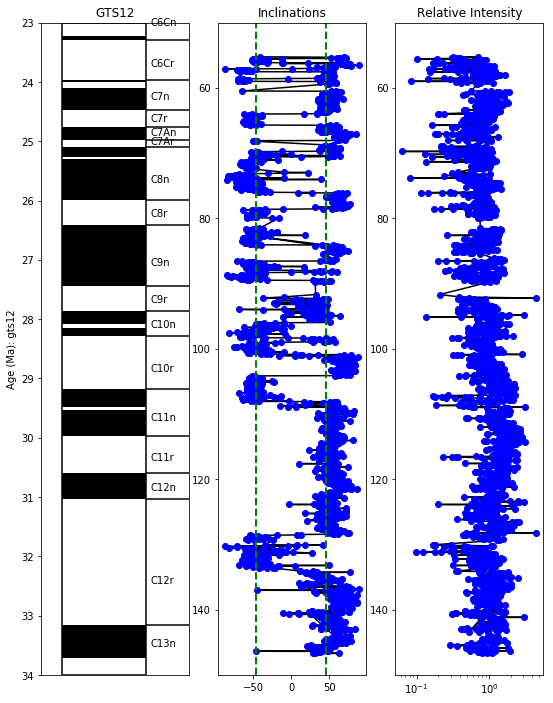

In [6]:
fig=plt.figure(1,(9,12))
ax=fig.add_subplot(131)
pmagplotlib.plot_ts(ax,23,34,timescale='gts12')
fig.add_subplot(132)
plt.plot(data.dir_inc,data.core_depth,'k-')
plt.plot(data.dir_inc,data.core_depth,'bo')
plt.ylim(35,23)
#plt.ylabel('Age (Ma)')
gad=np.degrees(np.arctan(2.*np.tan(np.radians(lat)))) # tan (I) = 2 tan (lat)
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
plt.ylim(150,50)
fig.add_subplot(133)
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'bo')
plt.ylim(150,50)
plt.title('Relative Intensity');


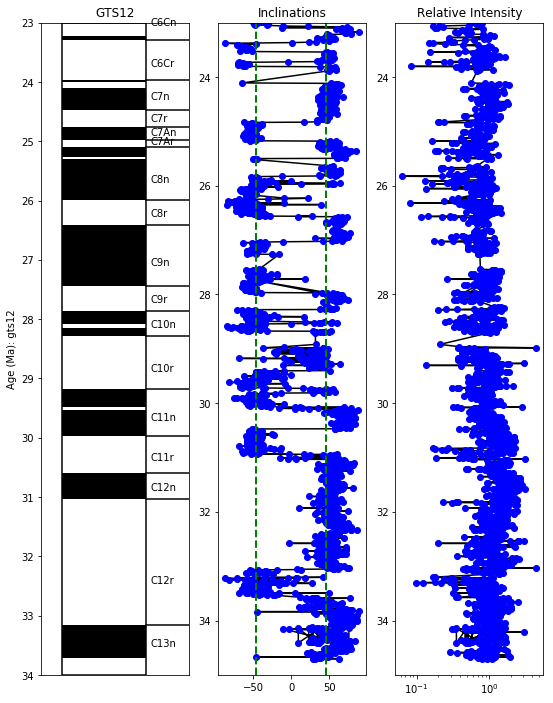

In [47]:
fig=plt.figure(1,(9,12))
ax=fig.add_subplot(131)
pmagplotlib.plot_ts(ax,23,34,timescale='gts12')
fig.add_subplot(132)
plt.plot(data.dir_inc,data.age,'k-')
plt.plot(data.dir_inc,data.age,'bo')
plt.ylim(35,23)
#plt.ylabel('Age (Ma)')
gad=np.degrees(np.arctan(2.*np.tan(np.radians(lat)))) # tan (I) = 2 tan (lat)
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
plt.ylim(35,23)
fig.add_subplot(133)
plt.semilogx(data.int_rel/data.int_rel.mean(),data.age,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),data.age,'bo')
plt.ylim(35,23)
plt.title('Relative Intensity');


## curie 

This can be done through **ipmag.curie()**.

In [7]:
help(ipmag.curie)

Help on function curie in module pmagpy.ipmag:

curie(path_to_file='.', file_name='magic_measurements.txt', window_length=3, save=False, save_folder='.', fmt='svg', t_begin='', t_end='')
    Plots and interprets curie temperature data.
    ***
    The 1st derivative is calculated from smoothed M-T curve (convolution
    with trianfular window with width= <-w> degrees)
    ***
    The 2nd derivative is calculated from smoothed 1st derivative curve
    (using the same sliding window width)
    ***
    The estimated curie temp. is the maximum of the 2nd derivative.
    Temperature steps should be in multiples of 1.0 degrees.
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains file (default is current directory, '.')
    file_name : name of file to be opened (default is 'magic_measurements.txt')
    window_length : dimension of smoothing window (input to smooth() function)
    save : boolean argument to save pl

second derivative maximum is at T=552


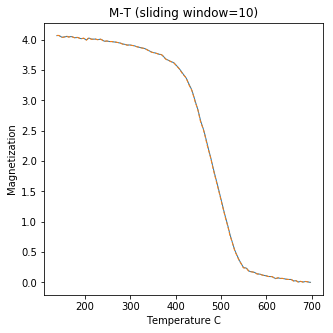

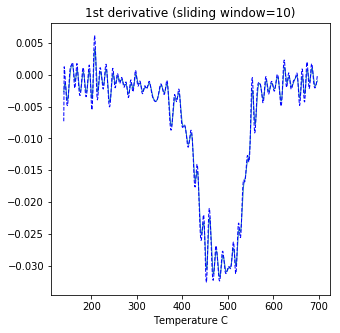

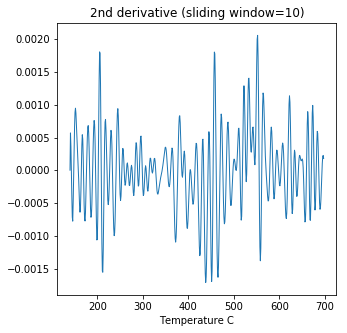

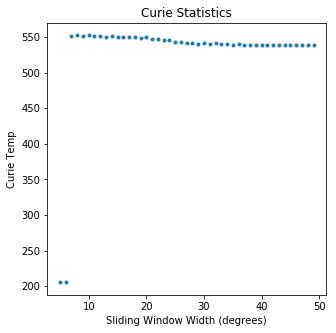

In [23]:
ipmag.curie(path_to_file='../curie',file_name='curie_example.dat',\
           window_length=10)

## dayplot_magic

This program can be replicated with **ipmag.dayplot**.

In [39]:
help(ipmag.dayplot)

Help on function dayplot in module pmagpy.ipmag:

dayplot(path_to_file='.', hyst_file='specimens.txt', rem_file='', save=False, save_folder='.', fmt='pdf', data_model=3)
    Makes 'day plots' (Day et al. 1977) and squareness/coercivity plots
    (Neel, 1955; plots after Tauxe et al., 2002); plots 'linear mixing'
    curve from Dunlop and Carter-Stiglitz (2006).
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains files (default is current directory, '.')
    the default input file is 'specimens.txt' (data_model=3
    if data_model = 2, then must these are the defaults:
        hyst_file : hysteresis file (default is 'rmag_hysteresis.txt')
        rem_file : remanence file (default is 'rmag_remanence.txt')
    save : boolean argument to save plots (default is False)
    save_folder : relative directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 

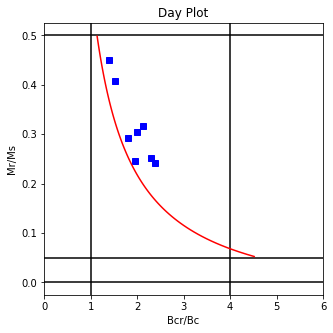

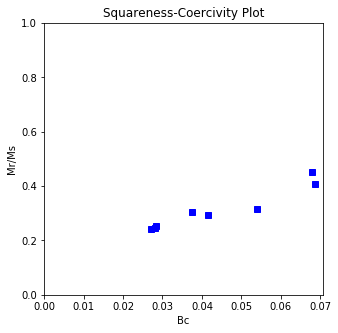

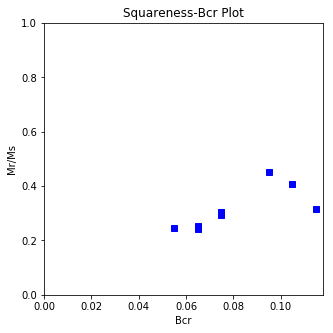

In [40]:
ipmag.dayplot(path_to_file='../dayplot_magic',hyst_file='dayplot_magic_example.dat',\
             data_model=2)

## di_eq

This program calls **pmag.dimap()** which we can do from within a Jupyter notebook.

In [42]:
help(pmag.dimap)

Help on function dimap in module pmagpy.pmag:

dimap(D, I)
    Function to map directions (declination, inclination) into an equal area
    projection (x,y).
    
    Parameters
    ----------
    D : declination (as float)
    I : inclination (as float)
    
    Returns
    -------
    XY : x, y values of directions for equal area projection [x,y]



In [54]:
DIs=np.loadtxt('../di_eq/di_eq_example.dat').transpose()
print (pmag.dimap(DIs[0],DIs[1]))

[[-0.23941025 -0.8934912 ]
 [ 0.43641303  0.71216134]
 [ 0.06384422  0.76030049]
 [ 0.32144709  0.68621606]
 [ 0.32271993  0.67056248]
 [ 0.40741223  0.54065429]
 [ 0.5801562   0.34037562]
 [ 0.10535089  0.65772758]
 [ 0.24717308  0.59968683]
 [ 0.18234908  0.61560016]
 [ 0.17481507  0.60171742]
 [ 0.282746    0.54547233]
 [ 0.26486315  0.53827299]
 [ 0.23575838  0.5345358 ]
 [ 0.29066509  0.50548208]
 [ 0.26062905  0.51151332]
 [ 0.23208983  0.51642328]
 [ 0.24444839  0.50566578]
 [ 0.27792652  0.46438138]
 [ 0.2505103   0.47715181]
 [ 0.29177004  0.44081644]
 [ 0.10876949  0.51614821]
 [ 0.19670646  0.48201446]
 [ 0.34938995  0.38129223]
 [ 0.1684068   0.47556614]
 [ 0.20628586  0.44644351]
 [ 0.17570082  0.45064929]
 [ 0.30110381  0.37853937]
 [ 0.20495497  0.42396971]
 [ 0.19975473  0.4225844 ]
 [ 0.34691999  0.30800998]
 [ 0.11902989  0.44114437]
 [ 0.23984794  0.37648585]
 [ 0.26952843  0.34250954]
 [ 0.08545091  0.42378931]
 [ 0.19222399  0.38723272]
 [ 0.17260777  0.39508358]
 

## di_geo
This program calls **pmag.dogeo()**. There is also **pmag.dogeo_V** for arrays of data. 
So start with **pmag.dogeo()**.

In [4]:
help(pmag.dogeo)

Help on function dogeo in module pmagpy.pmag:

dogeo(dec, inc, az, pl)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    dec : declination in specimen coordinates
    inc : inclination in specimen coordinates
    
    Returns
    -------
    rotated_direction : tuple of declination, inclination in geographic coordinates
    
    Examples
    --------
    >>> pmag.dogeo(0.0,90.0,0.0,45.5)
    (180.0, 44.5)



In [7]:
pmag.dogeo(dec=81,inc=45.2,az=347,pl=27)

(94.835485413375622, 43.021684901096322)

In [6]:
help(pmag.dogeo_V)

Help on function dogeo_V in module pmagpy.pmag:

dogeo_V(indat)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    indat: nested list of [dec, inc, az, pl] data
    
    Returns
    -------
    rotated_directions : lists of Declinations and Inclinations



In [8]:
indata=np.loadtxt('../di_geo/di_geo_example.dat')
print (indata)

[[ 288.1   35.8   67.   -36. ]
 [ 256.8   22.5   84.   -81. ]
 [ 262.4   19.1   91.   -48. ]
 [ 258.6   19.6   89.   -61. ]
 [ 259.9   54.7   49.   -76. ]
 [ 279.1   27.9   62.   -41. ]
 [ 228.3  -47.5  141.   -84. ]
 [ 249.8   25.    60.   -82. ]
 [ 239.8  -33.9  108.   -91. ]
 [ 271.7   50.8   28.   -52. ]
 [ 266.8   67.1   16.   -67. ]
 [ 238.9   51.9   27.   -76. ]
 [ 238.9   55.3   17.   -90. ]
 [ 252.6   41.    43.   -73. ]
 [ 112.7   17.1  282.6  -78. ]
 [ 134.9   -8.9  234.   -56. ]
 [ 138.6   -1.1  244.6  -73. ]
 [  83.5   31.1  292.   -28. ]
 [ 151.1  -35.2  196.6  -69. ]
 [ 146.8  -14.5  217.   -51. ]
 [  13.8   35.   332.6  -44. ]
 [ 293.1    3.9   53.5  -25.5]
 [  99.5  -11.   243.6  -30. ]
 [ 267.8  -12.7   91.5  -49. ]
 [  47.    12.8  298.6  -28. ]
 [  45.8   -9.   297.   -33.5]
 [  81.7  -26.8  254.6  -51. ]
 [  79.7  -25.7  256.   -60. ]
 [  84.7  -20.9  256.6  -60. ]
 [ 303.3   66.7    3.6  -71.5]
 [ 104.6   32.2  297.  -100.5]
 [ 262.8   77.9  357.1  -87. ]
 [  63.3

In [14]:
decs,incs=pmag.dogeo_V(indata)
print (decs,incs)

[  1.23907966e+01   1.49830732e+01   1.06667819e+01   1.14047553e+01
   1.24483163e+01   3.57299071e+02   3.53883281e+02   3.53789196e+02
   3.40503777e+02   3.42563974e+02   3.51164668e+02   3.49415385e+02
   3.46335983e+02   3.50937970e+02   3.59146910e+02   5.20812064e-01
   3.54368265e+02   9.11626301e-01   3.50170459e+02   3.54249362e-02
   3.43981389e+02   3.46130907e+02   3.47283278e+02   3.50443170e+02
   3.44495997e+02   3.52433892e+02   1.55709734e+00   4.40491709e+00
   2.54671945e+00   3.44221055e+02   3.52498530e+02   3.45060173e+02
   3.48635524e+02   3.49534584e+02   3.51173216e+02   3.57092897e+02
   3.56384865e+02] [ 18.97354242  15.5593373   18.16933424  18.99516324  17.20362035
  15.15615798  21.70912081  21.63657272  25.28892753  27.53745185
  22.32938052  29.97546268  17.1006907   24.05670149  24.95589898
  29.44812112  45.36441334  24.24032931  27.47045636  28.16456055
  -8.04836591  -6.14959601  -4.8321985   -6.65953274  -6.6962926
 -30.69729144 -22.57434594 -20.

## note to self: fix cookbook page.

## di_rot 
This program rotates dec inc pairs to a new origen.  We can call **pmag.dodirot()** for single [dec,inc,Dbar,Ibar] data or **pmag.dodirot_V()** for an array of Dec, Inc pairs.  

In [45]:
help(pmag.dodirot_V)

Help on function dodirot_V in module pmagpy.pmag:

dodirot_V(di_block, Dbar, Ibar)
    Rotate an array of dec/inc pairs to coordinate system with Dec,Inc as 0,90
    
    Parameters
    ___________________
    di_block : array of [[Dec1,Inc1],[Dec2,Inc2],....]
    Dbar : declination of desired center
    Ibar : inclination of desired center
    
    Returns
    __________
    array of rotated decs and incs: [[rot_Dec1,rot_Inc1],[rot_Dec2,rot_Inc2],....]



We do it like this: 
- read in a data set with dec inc pairs
- make an equal area projection of the data to see what they look like
- calculate the principal component with **pmag.doprinc())**
- rotate the data to the principal direction
- plot the rotated data in an equal area projection. 

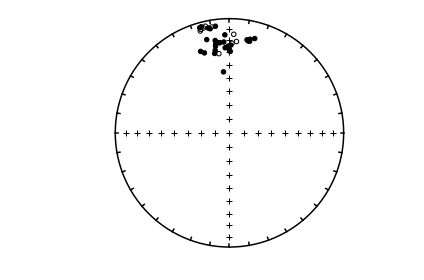

In [16]:
di_block=np.loadtxt('../di_geo/di_geo.out') # read in some data
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=di_block)

In [42]:
help(pmag.doprinc)
princ=pmag.doprinc(di_block)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components
        dec : principal directiion declination
        inc : principal direction inclination
        V2dec : intermediate eigenvector declination        
        V2inc : intermediate eigenvector inclination
        V3dec : minor eigenvector declination        
        V3inc : minor eigenvector inclination
        tau1 : major eigenvalue
        tau2 : intermediate eigenvalue
        tau3 : minor eigenvalue
        N  : number of points
        Edir : elongation direction [dec, inc, length]



In [44]:
rot_block=pmag.dodirot_V(di_block,princ['dec'],princ['inc'])
rot_block

array([[ 286.02435815,   72.05782519],
       [ 274.276049  ,   70.22090543],
       [ 284.92806468,   73.82778982],
       [ 286.94202373,   72.96225397],
       [ 280.27771216,   72.4822522 ],
       [ 304.30563895,   86.77972247],
       [ 359.89769098,   81.42521644],
       [   0.58903633,   81.51535203],
       [  40.46282285,   71.92239829],
       [  31.19590744,   71.72663361],
       [  14.40686098,   80.26484683],
       [  10.20158431,   72.45523677],
       [  57.84145159,   80.96290455],
       [  12.49485429,   78.47807897],
       [ 336.16857481,   77.4647786 ],
       [ 337.39083333,   72.90257789],
       [ 355.16071457,   57.76042705],
       [ 327.75482493,   77.51477712],
       [  10.48079578,   75.05056353],
       [ 337.45006938,   74.17995153],
       [ 147.42200844,   66.30691474],
       [ 150.22723796,   68.91756089],
       [ 151.92784861,   70.58221251],
       [ 162.26381172,   69.67831156],
       [ 147.04519212,   67.69047388],
       [ 171.84161835,   

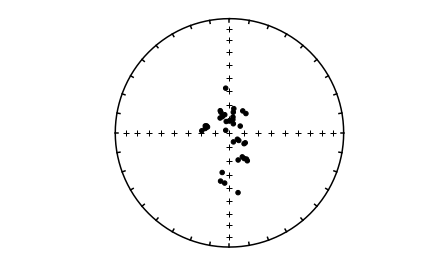

In [46]:
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=rot_block)

## di_tilt
We can perform the same thing as this program by calling  **pmag.dotilt** or **pmag.dotilt_V()** depending on if we have a single point or an array to rotate.

In [47]:
help(pmag.dotilt)

Help on function dotilt in module pmagpy.pmag:

dotilt(dec, inc, bed_az, bed_dip)
    Does a tilt correction on a direction (dec,inc) using bedding dip direction
    and bedding dip.
    
    Parameters
    ----------
    dec : declination directions in degrees
    inc : inclination direction in degrees
    bed_az : bedding dip direction
    bed_dip : bedding dip
    
    Returns
    -------
    dec,inc : a tuple of rotated dec, inc values
    
    Examples
    -------
    >>> pmag.dotilt(91.2,43.1,90.0,20.0)
    (90.952568837153436, 23.103411670066617)



In [49]:
help(pmag.dotilt_V)

Help on function dotilt_V in module pmagpy.pmag:

dotilt_V(indat)
    Does a tilt correction on an array with rows of dec,inc bedding dip direction and dip.
    
    Parameters
    ----------
    input : declination, inclination, bedding dip direction and bedding dip
    nested array of [[dec1, inc1, bed_az1, bed_dip1],[dec2,inc2,bed_az2,bed_dip2]...]
    
    Returns
    -------
    dec,inc : arrays of rotated declination, inclination



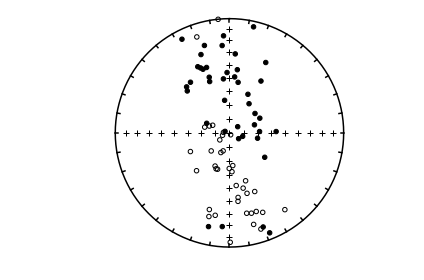

In [57]:
data=np.loadtxt('../di_tilt/di_tilt_example.dat') # load up the data
di_block=data[:,[0,1]] # let's plot the dec,inc data first
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)

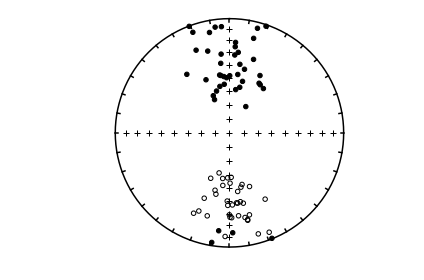

In [58]:
Dt,It=pmag.dotilt_V(data) # rotate them
ipmag.plot_net(1) # and take a look
ipmag.plot_di(dec=Dt,inc=It)

In [62]:
np.column_stack((Dt,It)) # if you want to see the output: 

array([[  3.74524673e+01,   4.95794971e+01],
       [  3.36467520e+02,   6.09447203e+01],
       [  3.38016562e+02,   2.29922937e+01],
       [  3.55656248e+02,   7.51556739e+00],
       [  8.17695697e+00,   5.86079487e+01],
       [  6.24312543e+00,   2.98149642e+01],
       [  3.57033733e+02,   5.00073921e+01],
       [  3.42811107e+02,   5.85702274e+01],
       [  3.39284414e+02,   3.48942163e-01],
       [  3.85757431e+00,   2.17049062e+01],
       [  3.54347623e+02,   4.89864710e+01],
       [  2.83925013e-01,   4.85556186e+01],
       [  3.35776430e+02,   6.39503873e+01],
       [  1.81481921e+01,   3.27972491e+01],
       [  3.53945383e+02,   3.12870301e+01],
       [  3.08201120e+01,   4.80808730e+01],
       [  2.80340193e+01,   4.25855265e+01],
       [  3.52849360e+02,   3.85903328e+01],
       [  3.51431548e+02,   4.79200709e+01],
       [  1.49895755e+01,   5.82971278e+00],
       [  2.01405693e+02,  -2.73644346e+01],
       [  1.94529222e+02,  -6.03000930e+01],
       [  

## di_vgp
This program calls **pmag.dia_vgp()** which we can do directly from within the notebook.

In [2]:
help(pmag.dia_vgp)

Help on function dia_vgp in module pmagpy.pmag:

dia_vgp(*args)
    Converts directional data (declination, inclination, alpha95) at a given
    location (Site latitude, Site longitude) to pole position (pole longitude,
    pole latitude, dp, dm)
    
    Parameters
    ----------
    Takes input as (Dec, Inc, a95, Site latitude, Site longitude)
    Input can be as individual values (5 parameters)
    or
    as a list of lists: [[Dec, Inc, a95, lat, lon],[Dec, Inc, a95, lat, lon]]
    
    Returns
    ----------
    if input is individual values for one pole the return is:
    pole longitude, pole latitude, dp, dm
    
    if input is list of lists the return is:
    list of pole longitudes, list of pole latitude, list of dp, list of dm



In [3]:
data=np.loadtxt('../di_vgp/di_vgp_example.dat')
print (data)

array([[  11. ,   63. ,   55. ,   13. ],
       [ 154. ,  -58. ,   45.5,  -73. ]])

The data are almost in the correct format, but there is no a95 field, so that will have to be inserted (as zeros). 

In [4]:
a95=np.zeros(len(data))
a95

array([ 0.,  0.])

In [7]:
DIs=data.transpose()[0:2].transpose() # get the DIs
LatLons=data.transpose()[2:].transpose() # get the Lat Lons
newdata=np.column_stack((DIs,a95,LatLons)) # stitch them back together
print (newdata)

[[  11.    63.     0.    55.    13. ]
 [ 154.   -58.     0.    45.5  -73. ]]


In [14]:
vgps=np.array(pmag.dia_vgp(newdata)) # get a tuple with lat,lon,dp,dm, convert to array
print (vgps.transpose()) #  print out the vgps

[[ 154.65869784   77.3180885     0.            0.        ]
 [   6.62978666  -69.63701906    0.            0.        ]]


## dipole_pinc
This calls **pmag.pinc()** and so will we! 


In [28]:
help(pmag.pinc)

Help on function pinc in module pmagpy.pmag:

pinc(lat)
    calculate paleoinclination from latitude using dipole formula: tan(I) = 2tan(lat)
    Parameters 
    ________________
    Input
    
    lat : either a single value or an array of latitudes
    
    Returns
    
    array of inclinations



In [29]:
lat=np.loadtxt('../dipole_pinc/dipole_pinc_example.dat')
lat

array(-24.0)

In [30]:
pmag.pinc(lat)

-41.683702035032219

## dipole_plat
This calls **pmag.plat()** and so will we: 

In [31]:
help(pmag.plat)

Help on function plat in module pmagpy.pmag:

plat(inc)
    calculate paleolatitude from inclination using dipole formula: tan(I) = 2tan(lat)
    Parameters 
    ________________
    Input
    
    inc : either a single value or an array of inclinations
    
    Returns
    
    array of latitudes



In [32]:
inc=np.loadtxt('../dipole_plat/dipole_plat_example.dat')
inc

array(23.0)

In [33]:
pmag.plat(inc)

11.982503173060421

## dmag_magic
This program calls **pmagplotlib.plotMT()** to plot the demagnetization curve for a sample, site, or entire data file interactively.  There is a version that will prepare dataframes for plotting with this function called **ipmag.plot_dmag()**. So let's try that: 

In [50]:
help(ipmag.plot_dmag)

Help on function plot_dmag in module pmagpy.ipmag:

plot_dmag(data='', title='', fignum=1, norm=1)
    plots demagenetization data versus step for all specimens in pandas dataframe datablock
    
    Parameters
    ______________
    data : Pandas dataframe with MagIC data model 3 columns:
        fignum : figure number
        specimen : specimen name
        demag_key : one of these: ['treat_temp','treat_ac_field','treat_mw_energy']
            selected using method_codes : ['LT_T-Z','LT-AF-Z','LT-M-Z'] respectively
        intensity  : one of these: ['magn_moment', 'magn_volume', 'magn_mass']
        quality : the quality column of the DataFrame
     title : title for plot
     norm : if True, normalize data to first step
    Output : 
      matptlotlib plot



Read in data from a MagIC data model 3 file:

In [57]:
data=pd.read_csv('../dmag_magic/measurements.txt',sep='\t',header=1)
data.columns

Index(['experiment', 'specimen', 'measurement', 'dir_csd', 'dir_dec',
       'dir_inc', 'hyst_charging_mode', 'hyst_loop', 'hyst_sweep_rate',
       'treat_ac_field', 'treat_ac_field_dc_off', 'treat_ac_field_dc_on',
       'treat_ac_field_decay_rate', 'treat_dc_field', 'treat_dc_field_ac_off',
       'treat_dc_field_ac_on', 'treat_dc_field_decay_rate',
       'treat_dc_field_phi', 'treat_dc_field_theta', 'treat_mw_energy',
       'treat_mw_integral', 'treat_mw_power', 'treat_mw_time',
       'treat_step_num', 'treat_temp', 'treat_temp_dc_off', 'treat_temp_dc_on',
       'treat_temp_decay_rate', 'magn_mass', 'magn_moment', 'magn_volume',
       'citations', 'instrument_codes', 'method_codes', 'quality', 'standard',
       'meas_field_ac', 'meas_field_dc', 'meas_freq', 'meas_n_orient',
       'meas_orient_phi', 'meas_orient_theta', 'meas_pos_x', 'meas_pos_y',
       'meas_pos_z', 'meas_temp', 'meas_temp_change', 'analysts',
       'description', 'software_packages', 'timestamp', 'magn_r2

We could hunt through the magn_* columns to see what is non-blank, but this data file has magn_moment data in it. 
We can make the plots in this way: 
- select the AF demagnetization data with method_codes = 'LT-AF-Z'
- make a dataframe with these columns:
     'specimen','treat_ac_field','magn_moment',and 'quality'
- call ipmag.plot_dmag() to view the plot: 

In [58]:
df=data[data.method_codes.str.contains('LT-AF-Z')] # select the thermal demag data
df=df[['specimen','treat_ac_field','magn_moment','quality']]
#df=df[df.specimen.str.contains('mc01')]
df=df.dropna(subset=['treat_ac_field','magn_moment'])
df.head()

,specimen,treat_ac_field,magn_moment,quality
1,mc01f,0.0050,0.000028,g
2,mc01f,0.0075,0.000028,g
3,mc01f,0.0100,0.000027,g
4,mc01f,0.0125,0.000026,g
5,mc01f,0.0150,0.000025,g


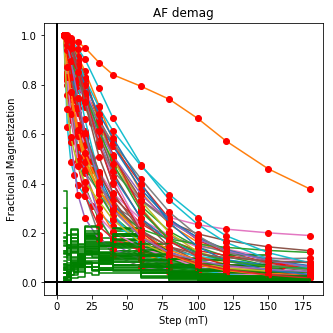

In [59]:
ipmag.plot_dmag(data=df,title="AF demag",fignum=1)

This plotted all the data in the file.  we could also plot the data by site:
- read in the specimens table to relate specimen to sample
- read in the sample table to relate sample to site
- merge the sample and site columns into the measurement table on the specimen column
- get a unique list of site names and walk through them one by one

In [60]:
spec_df=pd.read_csv('../dmag_magic/specimens.txt',sep='\t',header=1) # read in specimen table
samp_df=pd.read_csv('../dmag_magic/samples.txt',sep='\t',header=1) # read in sample table
spec_df=spec_df[['specimen','sample']] # trim specimen table to required columns
samp_df=samp_df[['sample','site']] # ditto sample table
df_ext=pd.merge(df,spec_df,how='inner',on='specimen') # merge sample to specimen name
df_ext=pd.merge(df_ext,samp_df,how='inner',on='sample') # merge site to sample name
df_ext.head() # see how we did

,specimen,treat_ac_field,magn_moment,quality,sample,site
0,mc01f,0.0050,0.000028,g,mc01f,mc01
1,mc01f,0.0075,0.000028,g,mc01f,mc01
2,mc01f,0.0100,0.000027,g,mc01f,mc01
3,mc01f,0.0125,0.000026,g,mc01f,mc01
4,mc01f,0.0150,0.000025,g,mc01f,mc01


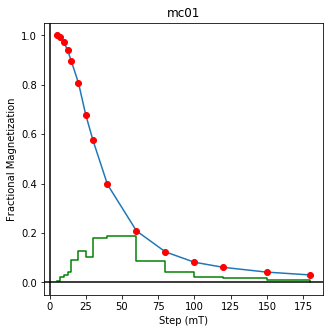

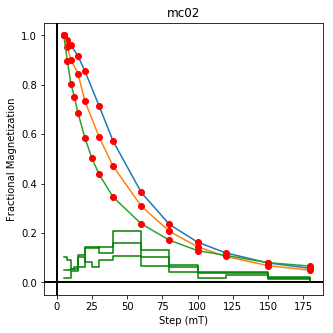

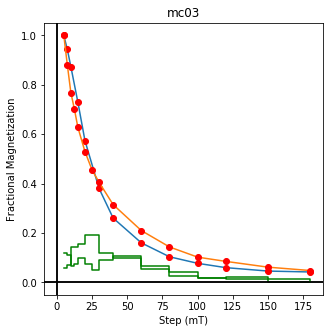

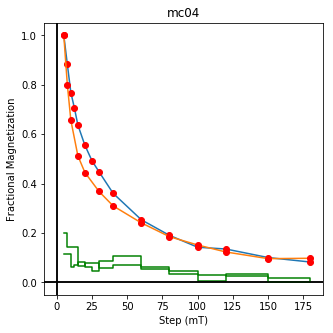

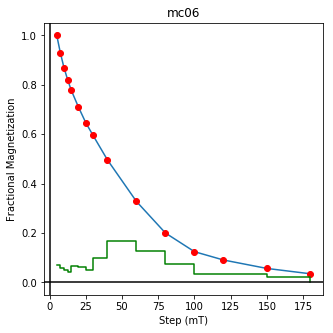

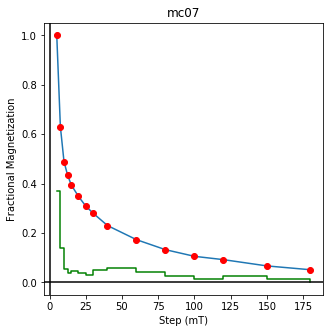

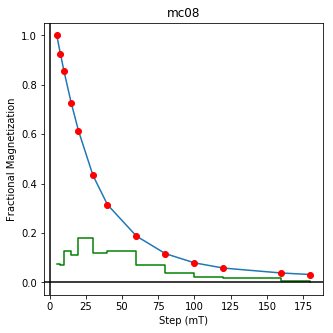

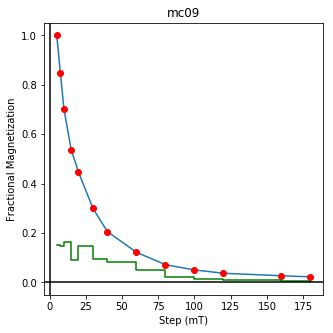

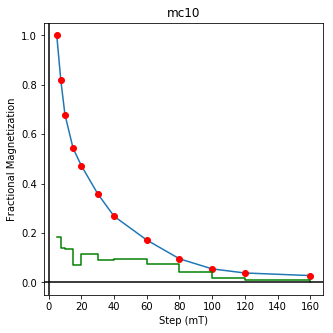

In [62]:
sites=df_ext.site.unique()
cnt=1
for site in sites:
    site_df=df_ext[df_ext.site==site] # fish out this site
    site_df=site_df[['specimen','treat_ac_field','magn_moment','quality']] # trim to essentials
    ipmag.plot_dmag(data=site_df,title=site,fignum=cnt)
    cnt+=1

We could repeat for thermal data if we felt like it using 'LT-T-Z' as the method_code key
and treat_temp as the step.  We could also save the plots using plt.savefig('FIGNAME.FMT') where FIGNAME could be the site, location, demag type as you wish.  

## download_magic
We can use the function **ipmag.download_magic()** for within the notebook use. 

In [3]:
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile, dir_path='.', input_dir_path='.', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir : str
        input directory (default ".")
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose output (default True)
    data_model : float
        MagIC data model 2.5 or 3 (default 3)
    separate_locs : bool
        create a sep

In [4]:
ipmag.download_magic(infile='Upgraded Contribution v3.0.txt',\
                     input_dir_path='../download_magic')

working on:  'contribution'
1  records written to file  ./contribution.txt
contribution  data put in  ./contribution.txt
working on:  'locations'
3  records written to file  ./locations.txt
locations  data put in  ./locations.txt
working on:  'sites'
52  records written to file  ./sites.txt
sites  data put in  ./sites.txt
working on:  'samples'
437  records written to file  ./samples.txt
samples  data put in  ./samples.txt
working on:  'specimens'
226  records written to file  ./specimens.txt
specimens  data put in  ./specimens.txt
working on:  'measurements'
3072  records written to file  ./measurements.txt
measurements  data put in  ./measurements.txt
working on:  'criteria'
20  records written to file  ./criteria.txt
criteria  data put in  ./criteria.txt
working on:  'ages'
20  records written to file  ./ages.txt
ages  data put in  ./ages.txt


True

## eigs_s
There is a function **ipmag.eigs_s()** which will do this in a notebook:

In [67]:
help(ipmag.eigs_s)

Help on function eigs_s in module pmagpy.ipmag:

eigs_s(infile='', dir_path='.')
    Converts eigenparamters format data to s format
    
    Parameters 
    ___________________
    Input: 
        file : input file name with eigenvalues (tau) and eigenvectors (V) with  format: 
            tau_1 V1_dec V1_inc tau_2 V2_dec V2_inc tau_3 V3_dec V3_inc 
    Output
         the six tensor elements as a nested array 
          [[x11,x22,x33,x12,x23,x13],....]



In [68]:
Ss=ipmag.eigs_s(infile="eigs_s_example.dat", dir_path='../eigs_s')
for s in Ss:
    print (s)

[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]


## eq_di

In [92]:
help(pmag.doeqdi)

Help on function doeqdi in module pmagpy.pmag:

doeqdi(x, y, UP=0)
    Takes digitized x,y, data and returns the dec,inc, assuming an
    equal area projection
    Parameters
    __________________
        x : array of digitized x from point on equal area projection
        y : array of  igitized y from point on equal area projection
        UP : if True, is an upper hemisphere projection
    Output :
        dec : declination
        inc : inclination



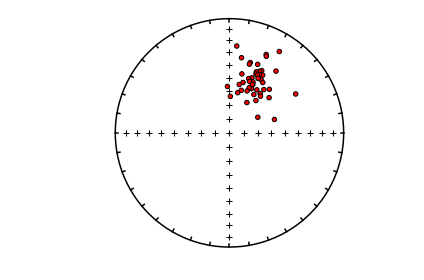

In [93]:
# read in the data into an array
# x is assumed first column, y, second
xy=np.loadtxt('../eq_di/eq_di_example.dat').transpose()
decs,incs=pmag.doeqdi(xy[0],xy[1])
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,color='r',edge='black')

## eqarea
This problem was solved by Nick Swanson-Hysell who started the **ipmag** module just for this purpose!  We use **ipmag.plot_net()** to plot the net, then **ipmag.plot_di()** to plot the directions.  

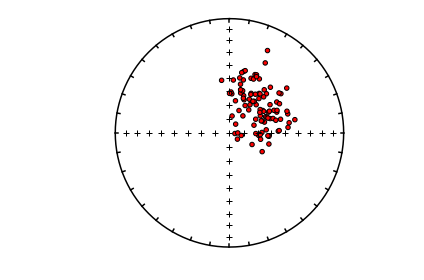

In [95]:
di_block=np.loadtxt('../eqarea/fishrot.out')
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## eqarea_ell
Makes plots of eqarea area projections and confidence ellipses for dec,inc pairs
We make the equal area projects with the **ipmag.plot_net()** and **ipmag.plot_di()** functions.  The options in eqarea_ell are: 
    Fisher mean(s) and alpha_95(s)
    Bingham mean and ellipse(s)
    Kent mean(s) - same as Fisher - and Kent ellipse(s)
    Bootstrapped mean(s)  - same as Fisher - and ellipse(s) 
    Bootstrapped eigenvectors
For Bingham mean, the N/R data are assumed antipodal and the procedure would be:
    - plot the data
    - calculate the bingham ellipse with **pmag.dobingham()**
    - plot the ellipse using **pmag.plot_di_mean_ellipse()**
All others, the data are not assumed antipodal, and must be separated into normal and reverse modes. To do that use **pmag.separate_directions()**. then:
    - calculate the ellipses for each mode:
        - Kent: use **pmag.dokent()**, setting NN to the number of data points
        - Bootstrap : use **pmag.di_boot()** to generate the bootstrapped means
            - either just plot the eigenvectors (ipmag.plot_di()) OR
            - calcualate the bootstrapped ellipses with **pmag.dokent()** setting NN to 1
    - plot the ellipses if desired. 
    

In [121]:
#read in the data into an array
vectors=np.loadtxt('../eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
di_block

array([[ 182.7,  -64.7],
       [ 354.7,   62.8],
       [ 198.1,  -68.1],
       [ 344.8,   61.8],
       [ 194. ,  -56.5],
       [ 350. ,   56.1],
       [ 214.2,  -55.3],
       [ 344.9,   56.5],
       [ 172.6,  -70.7],
       [   3. ,   60.9],
       [ 155.2,  -60.2],
       [   8.4,   65.1],
       [ 183.5,  -56.5],
       [ 342.5,   56.1],
       [ 175.5,  -53.4],
       [ 338.9,   73.3],
       [ 169.8,  -56.9],
       [ 347.1,   45.9],
       [ 183.2,  -52.5],
       [  12.5,   57.5]])

### Bingham ellipses

In [148]:
help(pmag.dobingham)

Help on function dobingham in module pmagpy.pmag:

dobingham(di_block)
    Calculates the Bingham mean and associated statistical parameters from
    directions that are input as a di_block
    
    Parameters
    ----------
    di_block : a nested list of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    bpars : dictionary containing the Bingham mean and associated statistics



In [150]:
help(ipmag.plot_di_mean_ellipse)

Help on function plot_di_mean_ellipse in module pmagpy.ipmag:

plot_di_mean_ellipse(dictionary, fignum=1, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination)  confidence ellipse.
    
    Parameters
    -----------
    dictionary : a dictionary generated by the pmag.dobingham or pmag.dokent funcitons



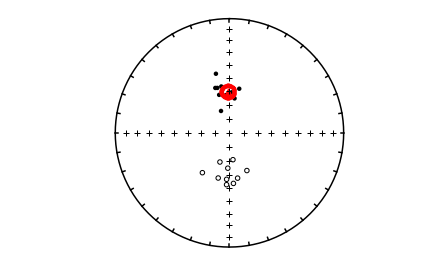

In [193]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)
bpars=pmag.dobingham(di_block)
ipmag.plot_di_mean_ellipse(bpars,color='red',marker='^',markersize=50)

### Fisher mean, a95

In [194]:
help(pmag.separate_directions)

Help on function separate_directions in module pmagpy.pmag:

separate_directions(di_block)
    Separates set of directions into two modes based on principal direction
    
    Parameters
    _______________
    Input 
        di_block : block of nested dec,inc pairs
    Ouput
        mode_1_block,mode_2_block :  two lists of nested dec,inc pairs



In [195]:
mode_1,mode_2=pmag.separate_directions(di_block)

In [196]:
help(ipmag.fisher_mean)

Help on function fisher_mean in module pmagpy.ipmag:

fisher_mean(dec=None, inc=None, di_block=None)
    Calculates the Fisher mean and associated parameters from either a list of
    declination values and a separate list of inclination values or from a
    di_block (a nested list a nested list of [dec,inc,1.0]). Returns a
    dictionary with the Fisher mean and statistical parameters.
    
    Parameters
    ----------
    dec : list of declinations or longitudes
    inc : list of inclinations or latitudes
    di_block : a nested list of [dec,inc,1.0]
        A di_block can be provided instead of dec, inc lists in which case it
        will be used. Either dec, inc lists or a di_block need to be provided.
    
    Returns
    -------
    fisher_mean : dictionary containing the Fisher mean parameters
    
    Examples
    --------
    Use lists of declination and inclination to calculate a Fisher mean:
    
    >>> ipmag.fisher_mean(dec=[140,127,142,136],inc=[21,23,19,22])
    {'alpha

In [197]:
mode_1_fpars=ipmag.fisher_mean(di_block=mode_1)
mode_2_fpars=ipmag.fisher_mean(di_block=mode_2)

In [125]:
help(ipmag.plot_di_mean)

Help on function plot_di_mean in module pmagpy.ipmag:

plot_di_mean(dec, inc, a95, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination) with alpha_95 ellipse on
    an equal area plot.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >fignum = 1
    >plt.figure(num=fignum,figsize=(10,10),dpi=160)
    >ipmag.plot_net(fignum)
    
    Required Parameters
    -----------
    dec : declination of mean being plotted
    inc : inclination of mean being plotted
    a95 : a95 confidence ellipse of mean being plotted
    
    Optional Parameters (defaults are used if not specified)
    -----------
    color : the default color is black. Other colors can be chosen (e.g. 'r').
    marker : the default is a circle. Other symbols can be chosen (e.g. 's').
    markersize : the default is 20. Other sizes can be chosen.
    label : the default is no label. Labels can be assi

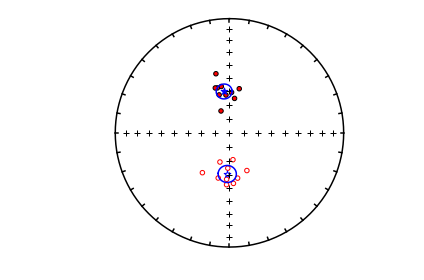

In [164]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)

ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)


### Kent mean and ellipse

In [169]:
help(pmag.dokent)

Help on function dokent in module pmagpy.pmag:

dokent(data, NN)
    gets Kent  parameters for data
    Parameters
    ___________________
    Input :
    data :  nested pairs of [Dec,Inc]
    NN  : normalization
        NN is the number of data for Kent ellipse
        NN is 1 for Kent ellipses of bootstrapped mean directions
    Output : 
    kpars dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [175]:
mode_1_kpars=pmag.dokent(mode_1,len(mode_1))
mode_2_kpars=pmag.dokent(mode_2,len(mode_2))

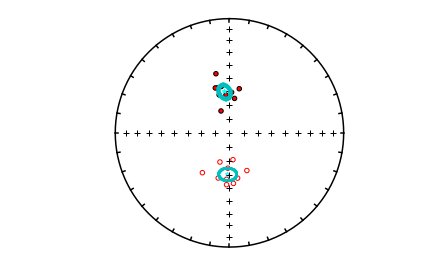

In [178]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_kpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_kpars,marker='*',color='cyan',markersize=20)

### Bootstrap eigenvectors

In [180]:
help(pmag.di_boot)

Help on function di_boot in module pmagpy.pmag:

di_boot(DIs, nb=5000)
    returns bootstrap means  for Directional data
    Parameters
    _________________
    Input :
       DIs : nested list of Dec,Inc pairs
       nb : number of bootstrap pseudosamples
    Output :
       nested list of bootstrapped mean Dec,Inc pairs



In [188]:
mode_1_BDIs=pmag.di_boot(mode_1)
mode_2_BDIs=pmag.di_boot(mode_2)

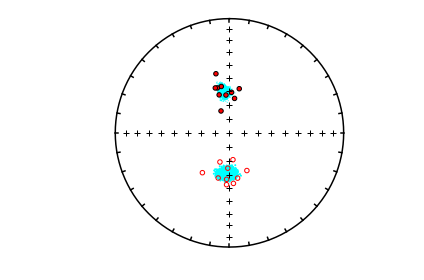

In [189]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=mode_1_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=mode_2_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')


### Boostrapped ellipses

In [190]:
mode_1_bpars=pmag.dokent(mode_1_BDIs,1)
mode_2_bpars=pmag.dokent(mode_2_BDIs,1)

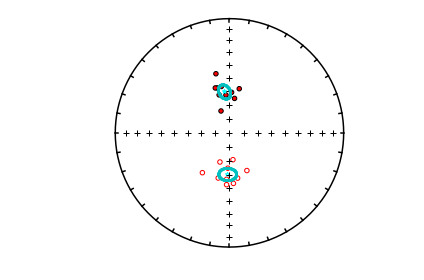

In [220]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_bpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_bpars,marker='*',color='cyan',markersize=20)

## eqarea_magic
**eqarea_magic.py** takes MagIC data model 3 files and makes equal area projections of declination, inclination data for a variety of  selections, 
i.e. all the data, by site, by sample, or by specimen
It has the option to plot in different coordinate systems (if available) and various ellipses.  It will also make a color contour plot if desired.  
We can reproduce most of this functionality with **ipmag.plot_net()** and **ipmag_plot_di()** using **Pandas** filtering capability.  

Let's start with a simple plot of site mean directions, assuming that they were interpreted from measurements using **pmag_gui.py** or some such program and have all the required meta-data.  

We want data in geographic coordinates (dir_tilt_correction=0).  The keys for directions are dir_dec and dir_inc.     One could add the ellipses using **ipmag.plot_di_mean_ellipse()**.  

### whole study


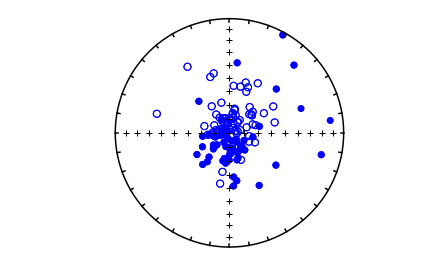

In [272]:
sites=pd.read_csv('../eqarea_magic/sites.txt',sep='\t',header=1)
site_dirs=sites[sites['dir_tilt_correction']==0]
ipmag.plot_net(1)
ipmag.plot_di(sites['dir_dec'].values,sites['dir_inc'].values,color='blue',markersize=50)

### specimens by site
This study averaged specimens (not samples) by site, so we would like to make plots of all the specimen data for each site.   We can do things the in a similar way to what we did in the **dmag_magic** example.  
A few particulars:
- We will be plotting specimen interpetations in geographic coordinates (dir_tilt_correction=0)
- We need to look at the method codes as there might be fisher means, principal components, great circles, etc.  A complete list of method codes for Direction Estimation can be found here:  https://www2.earthref.org/MagIC/method-codes
- There might be 'bad' directions - 'result_quality'='b' as opposed to 'g'.  
- There are a lot of sites in this study, so let's just look at the first 10...   

In [273]:
# read in specimen table
spec_df=pd.read_csv('../eqarea_magic/specimens.txt',sep='\t',header=1) 
# read in sample table
samp_df=pd.read_csv('../eqarea_magic/samples.txt',sep='\t',header=1) 
# get only what we need from samples (sample to site mapping)
samp_df=samp_df[['sample','site']] 
# merge site to specimen name in the specimen data frame
df_ext=pd.merge(spec_df,samp_df,how='inner',on='sample') 
# truncate to the first 10 sites
sites=df_ext.site.unique()[0:11]

We need to filter specimen data for dir_tilt_correction=0
and separate into DE-BFP (best fit planes) and not.

In [274]:
# get the geographic coordinates
spec_df=df_ext[spec_df.dir_tilt_correction==0]
# filter to exclude planes
spec_lines=spec_df[spec_df.method_codes.str.contains('DE-BFP')==False]
# filter for planes
spec_df_gc=spec_df[spec_df.method_codes.str.contains('DE-BFP')==True]

In [275]:
# here's a new one:
help(ipmag.plot_gc)

Help on function plot_gc in module pmagpy.ipmag:

plot_gc(poles, color='g', fignum=1)
    plots a great circle on an equal area projection
    Parameters
    ____________________
    Input
       fignum : number of matplotlib object
       poles : nested list of [Dec,Inc] pairs of poles
       color : color of lower hemisphere dots for great circle - must be in form: 'g','r','y','k',etc.
               upper hemisphere is always cyan



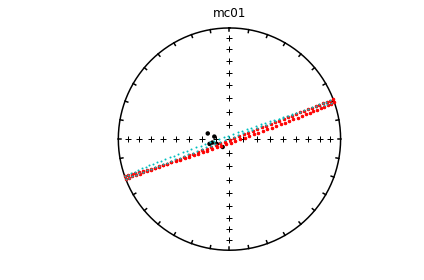

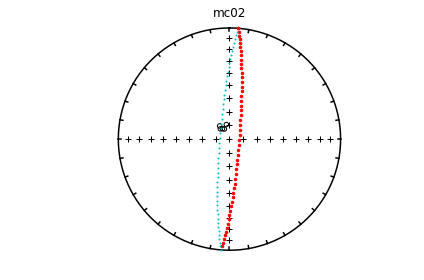

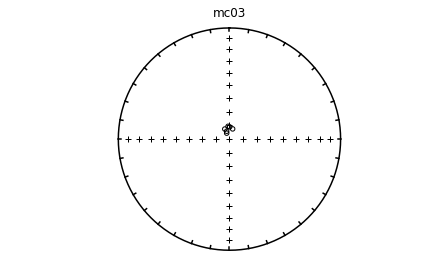

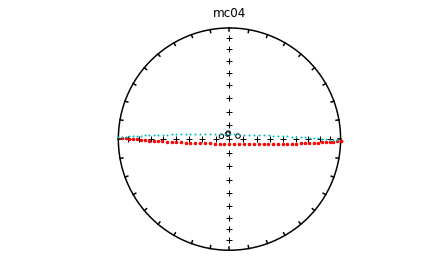

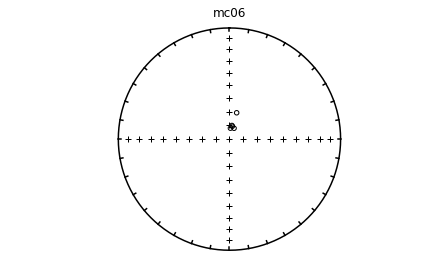

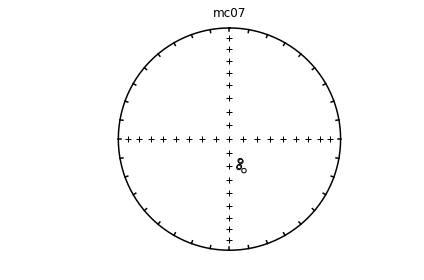

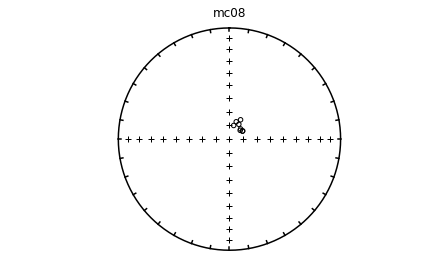

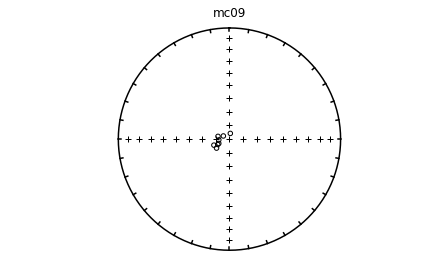

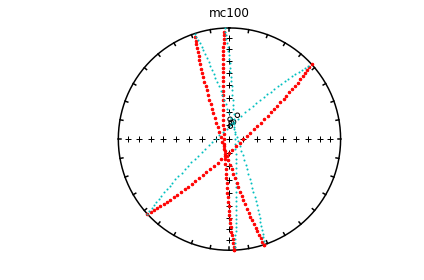

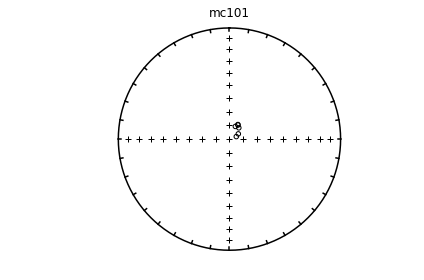

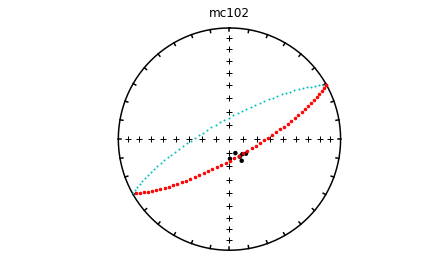

In [276]:
cnt=1
for site in sites:
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(site)
    site_lines=spec_lines[spec_lines.site==site] # fish out this site
    ipmag.plot_di(site_lines.dir_dec.values,site_lines.dir_inc.values)
    site_planes=spec_df_gc[spec_df_gc.site==site]
    poles=site_planes[['dir_dec','dir_inc']].values
    if poles.shape[0]>0:
        ipmag.plot_gc(poles,fignum=cnt,color='r')
    cnt+=1

### measurements by specimen

We can do this like this:

- read in the MagIC data model 3 measurements table into a **Pandas** data frame
- get a list of unique specimen names
- truncate this to the first 10 for this purpose
- plot the dir_dec and dir_inc fields by specimen


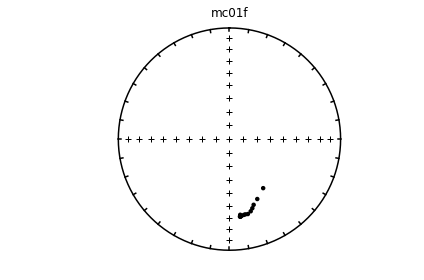

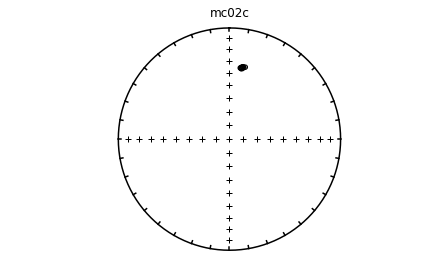

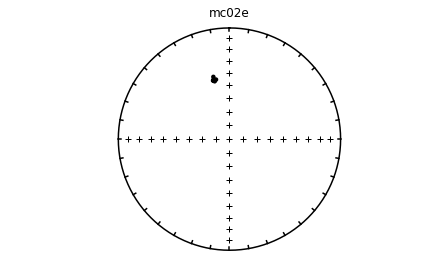

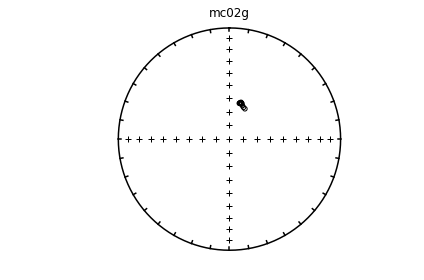

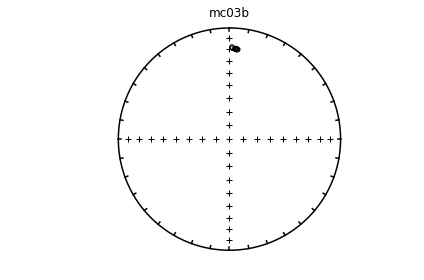

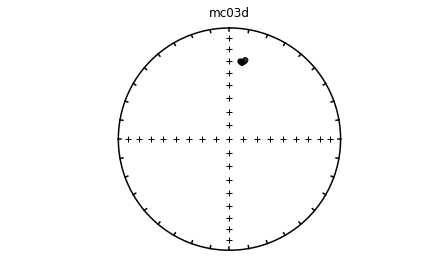

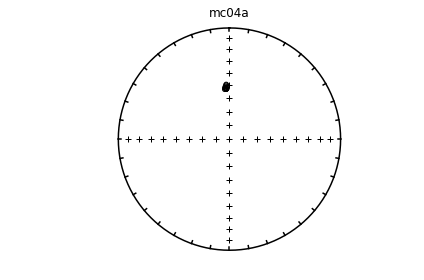

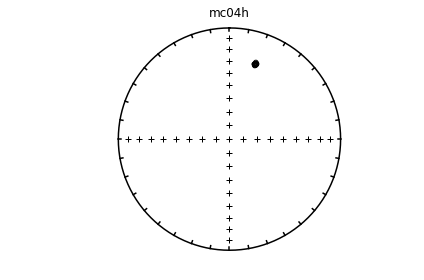

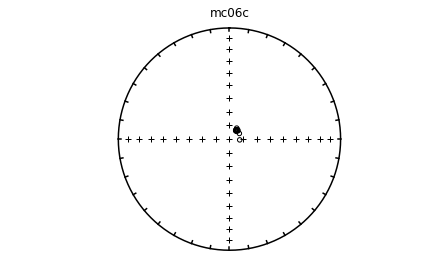

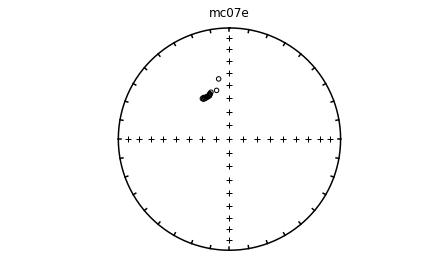

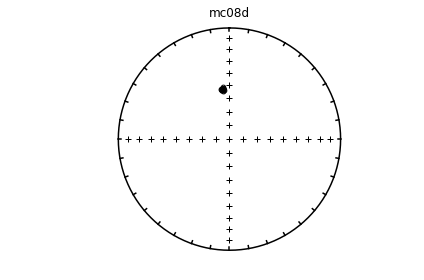

In [279]:
# read in measurements table
meas_df=pd.read_csv('../eqarea_magic/measurements.txt',sep='\t',header=1) 
specimens=meas_df.specimen.unique()[0:11]
cnt=1
for spec in specimens:
    meas_spc=meas_df[meas_df.specimen==spec]
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(spec)
    ipmag.plot_di(meas_spc.dir_dec.values,meas_spc.dir_inc.values)
    cnt+=1

## find_ei

This program has been implemented as **ipmag.find_ei()**.

In [3]:
help(ipmag.find_ei)

Help on function find_ei in module pmagpy.ipmag:

find_ei(data, nb=1000, save=False, save_folder='.', fmt='svg', site_correction=False, return_new_dirs=False)
    Applies series of assumed flattening factor and "unsquishes" inclinations assuming tangent function.
    Finds flattening factor that gives elongation/inclination pair consistent with TK03;
    or, if correcting by site instead of for study-level secular variation,
    finds flattening factor that minimizes elongation and most resembles a
    Fisherian distribution.
    Finds bootstrap confidence bounds
    
    Required Parameter
    -----------
    data: a nested list of dec/inc pairs
    
    Optional Parameters (defaults are used unless specified)
    -----------
    nb: number of bootstrapped pseudo-samples (default is 1000)
    save: Boolean argument to save plots (default is False)
    save_folder: path to folder in which plots should be saved (default is current directory)
    fmt: specify format of saved plots (defau

Bootstrapping.... be patient

The original inclination was: 38.9290449093

The corrected inclination is: 58.8324603221
with bootstrapped confidence bounds of: 48.6047479889 to 66.1330710186
and elongation parameter of: 1.46786548594
The flattening factor is: 0.425


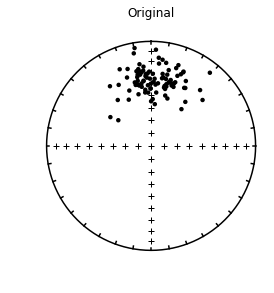

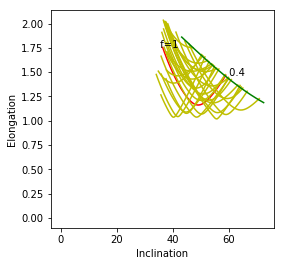

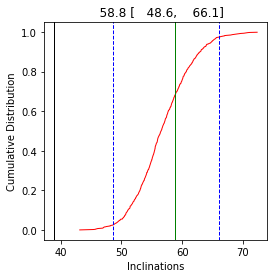

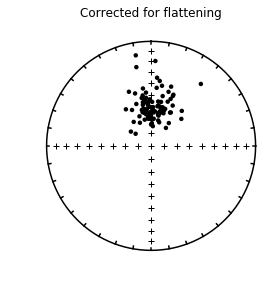

In [7]:
data=np.loadtxt('../find_EI/find_EI_example.dat')
ipmag.find_ei(data)

## fisher
**fisher.py** just calls the function **pmag.fshdev()** N times.

In [9]:
help(pmag.fshdev)

Help on function fshdev in module pmagpy.pmag:

fshdev(k)
    Generate a random draw from a Fisher distribution with mean declination
    of 0 and inclination of 90 with a specified kappa.
    
    Parameters
    ----------
    k : kappa (precision parameter) of the distribution
    
    Returns
    ----------
    dec, inc : declination and inclination of random Fisher distribution draw



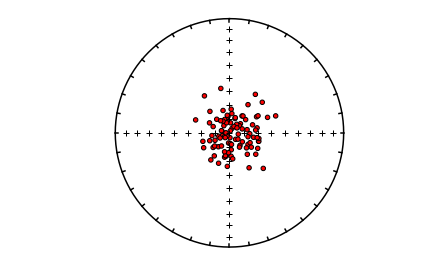

In [15]:
# set the number, N, and kappa
N,kappa=100,20
# a basket to put things in
fish=[]
# get the Fisherian deviates
for i in range(N):
    d,i=pmag.fshdev(kappa)
    fish.append([d,i])
ipmag.plot_net(1)
ipmag.plot_di(di_block=fish,color='r',edge='black')

## fishqq
Blessedly, this has been incorporated into **ipmag.fishqq()**.  

In [16]:
help(ipmag.fishqq)

Help on function fishqq in module pmagpy.ipmag:

fishqq(lon=None, lat=None, di_block=None)
    Test whether a distribution is Fisherian and make a corresponding Q-Q plot.
    The Q-Q plot shows the data plotted against the value expected from a
    Fisher distribution. The first plot is the uniform plot which is the
    Fisher model distribution in terms of longitude (declination). The second
    plot is the exponential plot which is the Fisher model distribution in terms
    of latitude (inclination). In addition to the plots, the test statistics Mu
    (uniform) and Me (exponential) are calculated and compared against the
    critical test values. If Mu or Me are too large in comparision to the test
    statistics, the hypothesis that the distribution is Fisherian is rejected
    (see Fisher et al., 1987).
    
    Parameters:
    -----------
    lon : longitude or declination of the data
    lat : latitude or inclination of the data
        or
    di_block: a nested list of [dec,inc

consistent with Fisherian model


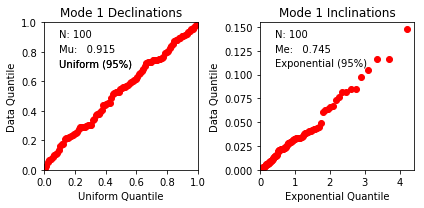

In [19]:
di_block=np.loadtxt('../fishqq/fishqq_example.txt')
fqpars=ipmag.fishqq(di_block=di_block)
print (fqpars['Test_result'])

## fishrot
This has been implemented as **ipmag.fishrot()**. 

In [20]:
help(ipmag.fishrot)

Help on function fishrot in module pmagpy.ipmag:

fishrot(k=20, n=100, dec=0, inc=90, di_block=True)
    Generates Fisher distributed unit vectors from a specified distribution
    using the pmag.py fshdev and dodirot functions.
    
    Parameters
    ----------
    k : kappa precision parameter (default is 20)
    n : number of vectors to determine (default is 100)
    dec : mean declination of distribution (default is 0)
    inc : mean inclination of distribution (default is 90)
    di_block : this function returns a nested list of [dec,inc,1.0] as the default
    if di_block = False it will return a list of dec and a list of inc
    
    Returns
    ---------
    di_block : a nested list of [dec,inc,1.0] (default)
    dec, inc : a list of dec and a list of inc (if di_block = False)
    
    Examples
    --------
    >>> ipmag.fishrot(k=20, n=5, dec=40, inc=60)
    [[44.766285502555775, 37.440866867657235, 1.0],
     [33.866315796883725, 64.732532250463436, 1.0],
     [47.0029127705

In [26]:
rotdi=ipmag.fishrot(k=50,n=5,dec=33,inc=41)
for di in rotdi:
    print ('%7.1f %7.1f'%(di[0],di[1]))

   12.2    42.8
   33.8    33.4
   29.8    52.3
   37.2    45.3
   22.3    50.0


## foldtest
This can be done via **pmag.bootstrap_fold_test()** in a notebook.

In [4]:
help(ipmag.bootstrap_fold_test)

Help on function bootstrap_fold_test in module pmagpy.ipmag:

bootstrap_fold_test(Data, num_sims=1000, min_untilt=-10, max_untilt=120, bedding_error=0, save=False, save_folder='.', fmt='svg', ninety_nine=False)
    Conduct a bootstrap fold test (Tauxe and Watson, 1994)
    
    Three plots are generated: 1) equal area plot of uncorrected data;
    2) tilt-corrected equal area plot; 3) bootstrap results showing the trend
    of the largest eigenvalues for a selection of the pseudo-samples (red
    dashed lines), the cumulative distribution of the eigenvalue maximum (green
    line) and the confidence bounds that enclose 95% of the pseudo-sample
    maxima. If the confidence bounds enclose 100% unfolding, the data "pass"
    the fold test.
    
    Parameters
    ----------
    Data : a numpy array of directional data [dec, inc, dip_direction, dip]
    num_sims : number of bootstrap samples (default is 1000)
    min_untilt : minimum percent untilting applied to the data (default is -10%)

doing  1000  iterations...please be patient.....


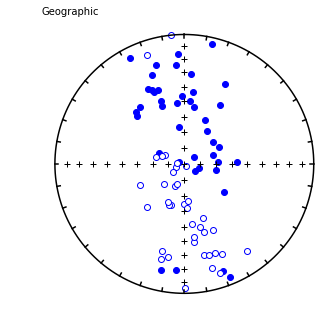

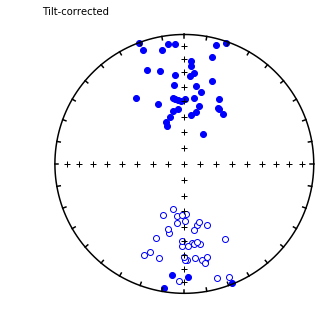


tightest grouping of vectors obtained at (95% confidence bounds):
83 - 119 percent unfolding
range of all bootstrap samples: 
72  -  119 percent unfolding


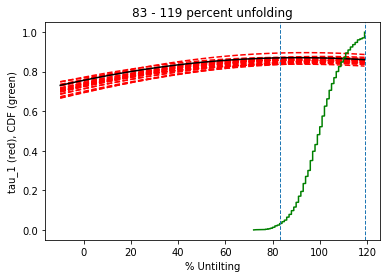

In [6]:
data=np.loadtxt('../foldtest/foldtest_example.dat')
ipmag.bootstrap_fold_test(data)

## foldtest_magic
This is just the MagIC formatted file version of **foldtest.py** and can be done using **ipmag.bootstrap_fold_test()** as above.  We just have to read in the MagIC formattest files and make a data matrix of the format expected by **ipmag.bootstrap_fold_test()**.  Here, **Pandas** is our friend.  We will: 
- Read in the MagIC (data model 3) formatted file
- Make a **Numpy** array with the required fields
- call **ipmag.bootstrap_foldtest_magic()**

In [38]:
sites=pd.read_csv('../foldtest_magic/sites.txt',sep='\t',header=1)
sites.columns

Index(['bed_dip', 'bed_dip_direction', 'citations', 'conglomerate_test',
       'contact_test', 'description', 'dir_dec', 'dir_inc', 'dir_k',
       'dir_n_samples', 'dir_nrm_origin', 'dir_polarity',
       'dir_tilt_correction', 'geologic_classes', 'geologic_types', 'lat',
       'lithologies', 'location', 'lon', 'method_codes', 'result_quality',
       'result_type', 'site', 'vgp_lat', 'vgp_lon', 'vgp_n_samples'],
      dtype='object')

The columns we need are: dir_dec, dir_inc, bed_dip_direction, bed_dip
The dir_dec and dir_inc have to have a dir_tilt_correction of 0 (geographic coordinates).
A little looking through the sites data file shows that the bed_dip_direction are on a separate line (oh database conversion tool maestro, how clever!).  So we will have to pair the bedding orientations with the geographic directional info.  Thank goodness for **Pandas**!


In [45]:
# read in data file
sites=pd.read_csv('../foldtest_magic/sites.txt',sep='\t',header=1)
# get the records with bed_dip and bed_dip_direction
sites_bedding=sites.dropna(subset=['bed_dip','bed_dip_direction'])
# get rid of them out of the original data frame
sites.drop(['bed_dip','bed_dip_direction'],axis=1,inplace=True)
# just pick out what we want (bedding orientation of the sites)
sites_bedding=sites_bedding[['site','bed_dip','bed_dip_direction']]
# put them back into the original data frame
sites=pd.merge(sites,sites_bedding,how='inner',on='site')
# now we can pick out the desired coordinate system
sites_geo=sites[sites_ext.dir_tilt_correction==0]
# and make our data array
data=sites_geo[['dir_dec','dir_inc','bed_dip_direction','bed_dip']].values
data

array([[ 293.1,   34.5,  135. ,   10. ],
       [ 290.6,   31.9,  140. ,   12. ],
       [ 310. ,   24.6,  146. ,   14. ],
       [ 303.9,   18.2,  135. ,   12. ],
       [ 297.3,   33.1,  135. ,   10. ],
       [ 112.6,  -18.1,  131. ,   28. ],
       [ 124.5,  -45.3,  149. ,   20. ],
       [ 144.3,  -47. ,  150. ,   18. ],
       [ 121. ,  -39.1,  145. ,   20. ],
       [ 129.7,  -12.1,  134. ,   30. ],
       [ 106.7,  -33.9,  132. ,   30. ],
       [ 123.2,   -9.6,  132. ,   40. ],
       [ 126.4,   -3.3,  120. ,   35. ],
       [ 111.9,  -36.2,  120. ,   20. ],
       [ 117.6,  -16.1,  115. ,   30. ],
       [ 107.7,   -9.3,  110. ,   45. ],
       [  99.1,  -29.8,  110. ,   25. ],
       [ 123.8,  -43.2,  155. ,   12. ],
       [ 132.1,  -53. ,  133. ,   12. ],
       [ 122.3,  -46. ,  132. ,   10. ],
       [ 100.8,  -45.9,  110. ,   20. ],
       [  97.9,  -38.9,  110. ,   20. ],
       [ 122.1,  -55.1,  145. ,   10. ],
       [ 122.2,  -22.3,  145. ,   20. ],
       [ 130.9, 

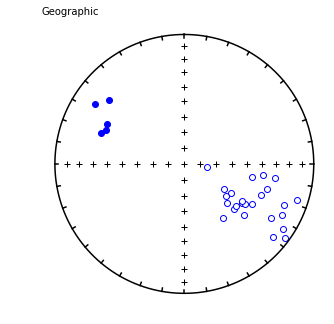

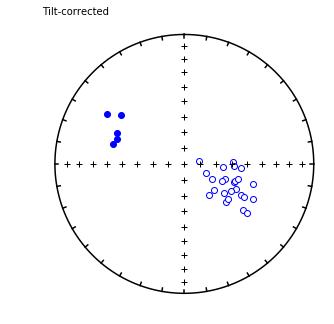

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
96 - 119 percent unfolding
range of all bootstrap samples: 
79  -  119 percent unfolding


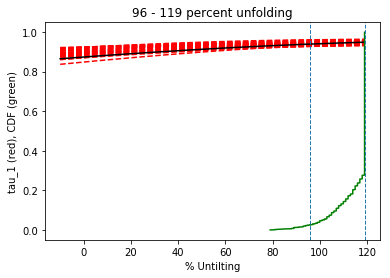

In [46]:
# and off we go! 
ipmag.bootstrap_fold_test(data)

## gaussian
So.. this program calls **pmag.gaussdev()** which just calls **numpy.random.normal()** which we could do, but we would have to import it, so it is easiest just to call the **pmag** version which we have already imported.  

In [51]:
reload(pmag)
help(pmag.gaussdev)

Help on function gaussdev in module pmagpy.pmag:

gaussdev(mean, sigma, N=1)
        returns a number randomly drawn from a gaussian distribution with the given mean, sigma
        Parmeters:
        _____________________________
        Inputs
           mean : mean of the gaussian distribution from which to draw deviates
           sigma : standard deviation of same
           N : number of deviates desired
    
        Returns
           N deviates from the normal distribution from
    .



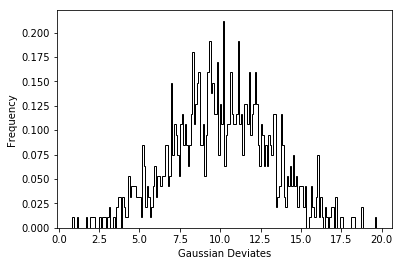

In [61]:
N=1000
bins=200
norm=pmag.gaussdev(10,3,N)
plt.hist(norm,bins=bins,histtype='step',color='black',normed=1,facecolor='white')
plt.xlabel('Gaussian Deviates')
plt.ylabel('Frequency');

## gobing
This just calls **pmag.dobingham()**, so we can do that

In [69]:
help(pmag.dobingham)

Help on function dobingham in module pmagpy.pmag:

dobingham(di_block)
    Calculates the Bingham mean and associated statistical parameters from
    directions that are input as a di_block
    
    Parameters
    ----------
    di_block : a nested list of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    bpars : dictionary containing the Bingham mean and associated statistics
    dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [70]:
di_block=np.loadtxt('../gobing/gobing_example.txt')
pmag.dobingham(di_block)


{'Edec': 105.71735145158095,
 'Einc': 9.9569002682367849,
 'Eta': 4.4907543191720025,
 'Zdec': 20.993890657557721,
 'Zeta': 4.4800269078036408,
 'Zinc': -27.647853556651516,
 'dec': 357.77952733337463,
 'inc': 60.3168380083183,
 'n': 20}

## gofish
This can be done with **ipmag.fisher_mean()** which just calls **pmag.fisher_mean()**.  **ipmag.fisher_mean()** is a little more flexible with data formats, so let's use that.  


In [72]:
help(ipmag.fisher_mean)

Help on function fisher_mean in module pmagpy.ipmag:

fisher_mean(dec=None, inc=None, di_block=None)
    Calculates the Fisher mean and associated parameters from either a list of
    declination values and a separate list of inclination values or from a
    di_block (a nested list a nested list of [dec,inc,1.0]). Returns a
    dictionary with the Fisher mean and statistical parameters.
    
    Parameters
    ----------
    dec : list of declinations or longitudes
    inc : list of inclinations or latitudes
    di_block : a nested list of [dec,inc,1.0]
        A di_block can be provided instead of dec, inc lists in which case it
        will be used. Either dec, inc lists or a di_block need to be provided.
    
    Returns
    -------
    fisher_mean : dictionary containing the Fisher mean parameters
    
    Examples
    --------
    Use lists of declination and inclination to calculate a Fisher mean:
    
    >>> ipmag.fisher_mean(dec=[140,127,142,136],inc=[21,23,19,22])
    {'alpha

In [74]:
di_block=np.loadtxt('../gofish/fishrot.out')
ipmag.fisher_mean(di_block=di_block)

{'alpha95': 6.3204467300511391,
 'csd': 10.511525802823254,
 'dec': 10.783552984917437,
 'inc': 39.602582993520244,
 'k': 59.379770717798884,
 'n': 10,
 'r': 9.8484332308595075}

## gokent
This calls **pmag.dokent()** (see also **eqarea_ell** example)

In [75]:
help(pmag.dokent)

Help on function dokent in module pmagpy.pmag:

dokent(data, NN)
    gets Kent  parameters for data
    Parameters
    ___________________
    Input :
    data :  nested pairs of [Dec,Inc]
    NN  : normalization
        NN is the number of data for Kent ellipse
        NN is 1 for Kent ellipses of bootstrapped mean directions
    Return : 
    kpars dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [77]:
di_block=np.loadtxt('../gokent/gokent_example.txt')
pmag.dokent(di_block,di_block.shape[0])

{'Edec': 147.69921287231705,
 'Einc': 30.819395154843157,
 'Eta': 9.3046593032996263,
 'Zdec': 246.82080930796928,
 'Zeta': 7.8051512371850489,
 'Zinc': 14.881429411175574,
 'dec': 359.15304567103982,
 'inc': 55.033415542547942,
 'n': 20}

## goprinc
This calls **pmag.doprinc()**, so why not us?

In [78]:
help(pmag.doprinc)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components
        dec : principal directiion declination
        inc : principal direction inclination
        V2dec : intermediate eigenvector declination        
        V2inc : intermediate eigenvector inclination
        V3dec : minor eigenvector declination        
        V3inc : minor eigenvector inclination
        tau1 : major eigenvalue
        tau2 : intermediate eigenvalue
        tau3 : minor eigenvalue
        N  : number of points
        Edir : elongation direction [dec, inc, length]



In [79]:
di_block=np.loadtxt('../goprinc/goprinc_example.txt')
pmag.doprinc(di_block)

{'Edir': array([ 151.85261736,   29.07891169,    1.        ]),
 'N': 20,
 'V2dec': 151.85261735984162,
 'V2inc': 29.078911691227447,
 'V3dec': 250.25426093396385,
 'V3inc': 14.721055437689328,
 'dec': 3.8694438466644669,
 'inc': 56.740159941913355,
 'tau1': 0.87783141428962386,
 'tau2': 0.071245400428762526,
 'tau3': 0.050923185281613582}

## grab_magic_key
This program was written before the marvelous **Pandas** made life easy.  It reads in a MagIC formatted data file and prints out the desired key.  We can do that!

In [82]:
sites=pd.read_csv('../download_magic/sites.txt',sep='\t',header=1)
print (sites.lat)

0     42.60264
1     42.60264
2     42.60260
3     42.60264
4     42.60352
5     42.60350
6     42.60104
7     42.60100
8     42.73656
9     42.73660
10    42.84180
11    42.84180
12    42.86570
13    42.86570
14    42.92031
15    42.92030
16    42.56857
17    42.49964
18    42.49962
19    42.49960
20    42.50001
21    42.50000
22    42.52872
23    42.52870
24    42.45559
25    42.45560
26    42.48923
27    42.48920
28    42.46186
29    42.46190
30    42.69156
31    42.65289
32    42.65290
33    43.30504
34    43.30500
35    43.36817
36    43.36817
37    43.36820
38    43.42133
39    43.42130
40    43.88590
41    43.88590
42    43.88590
43    43.84273
44    43.84270
45    43.53289
46    43.57494
47    43.57494
48    43.57490
49    44.15663
50    44.15660
51    44.18629
Name: lat, dtype: float64
